# Malthusian Growth Model Analysis

The Malthusian Growth Model is the simplest model of population dynamics. It assumes that the rate of population change is proportional to the current population size.

### 1. The Differential Equation
The model is defined by the first-order ordinary differential equation (ODE):

$$\frac{dN}{dt} = rN$$

Where:
* $N(t)$ is the population size at time $t$.
* $r$ is the intrinsic growth rate (birth rate minus death rate).
* $t$ is time.

### 2. Analytical Solution
By separating variables and integrating, the general solution is:

$$N(t) = N_0 e^{rt}$$

Where $N_0$ is the initial population at $t=0$.

### 3. Equilibrium and Stability
An equilibrium (fixed) point occurs where the population stops changing, i.e., $\frac{dN}{dt} = 0$.
* **Fixed Point:** $N^* = 0$ (The trivial solution).
* **Stability:** Depends on $r$.
    * If $r > 0$: The fixed point is **Unstable** (population explodes away from 0).
    * If $r < 0$: The fixed point is **Stable** (population decays toward 0).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

plt.style.use('seaborn-v0_8-darkgrid')

In [2]:
def malthusian_model(N, t, r):
    """
    dN/dt = r * N
    """
    return r * N

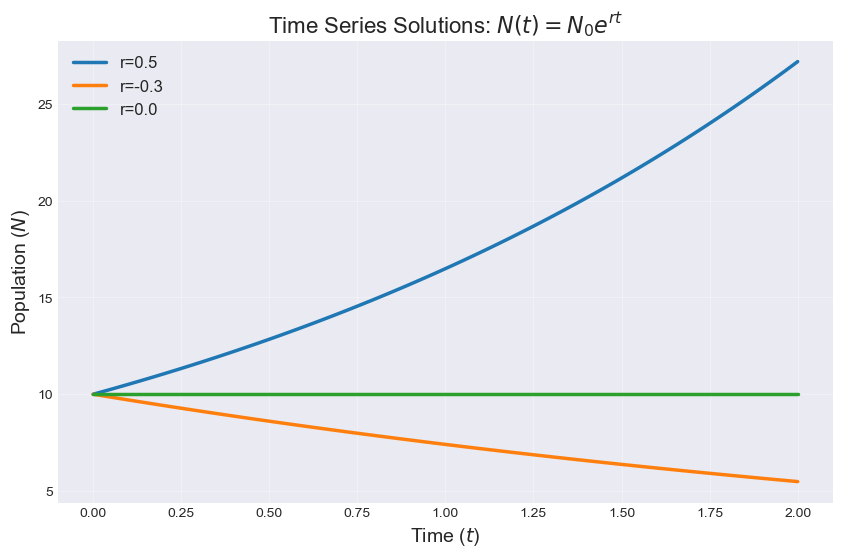

In [15]:
t = np.linspace(0, 2, 100)   # Time steps from 0 to 2
N0 = 10                      # Initial population
r_values = [0.5, -0.3, 0.0]  # Different growth rates: Positive, Negative, Zero

fig, ax = plt.subplots(figsize=(10, 6))

for r in r_values:
    N_t = odeint(malthusian_model, N0, t, args=(r,))
    ax.plot(t, N_t, linewidth=2.5, label=f"r={r}")

ax.set_title('Time Series Solutions: $N(t) = N_0 e^{rt}$', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Population ($N$)', fontsize=14)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)

plt.show()

### Slope Field

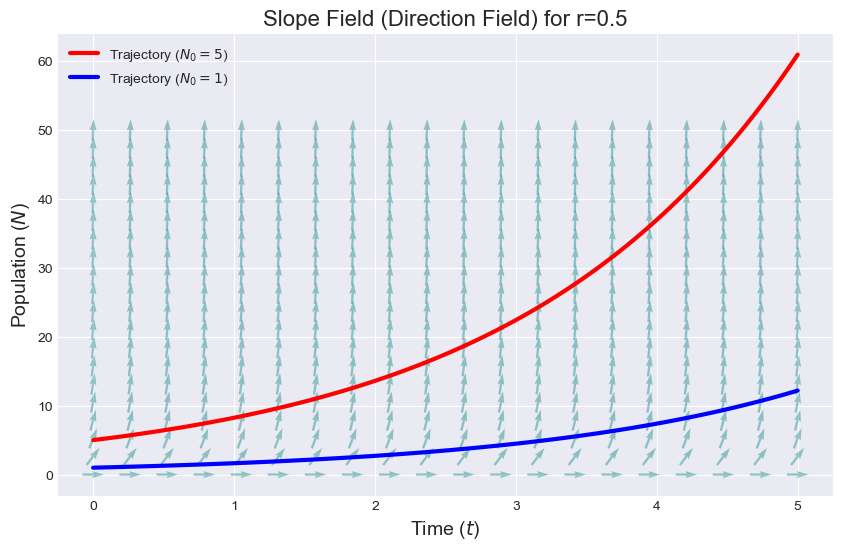

In [14]:
t_mesh = np.linspace(0, 5, 20)
N_mesh = np.linspace(0, 50, 20)
T, N = np.meshgrid(t_mesh, N_mesh)

r_slope = 0.5
dN = r_slope * N
dT = np.ones(dN.shape)

L = np.sqrt(dT**2 + dN**2)
dT_norm = dT / L
dN_norm = dN / L


fig, ax = plt.subplots(figsize=(10, 6))
ax.quiver(T, N, dT_norm, dN_norm, color='teal', alpha=0.4, pivot='mid')


t_traj = np.linspace(0, 5, 100)
N_traj = odeint(malthusian_model, y0=5, t=t_traj, args=(r_slope,))
ax.plot(t_traj, N_traj, 'r-', linewidth=3, label='Trajectory ($N_0=5$)')
N_traj2 = odeint(malthusian_model, y0=1, t=t_traj, args=(r_slope,))
ax.plot(t_traj, N_traj2, 'b-', linewidth=3, label='Trajectory ($N_0=1$)')

ax.set_title(f'Slope Field (Direction Field) for r={r_slope}', fontsize=16)
ax.set_xlabel('Time ($t$)', fontsize=14)
ax.set_ylabel('Population ($N$)', fontsize=14)
ax.legend()

plt.show()

### Stability Analysis

In [17]:
def analyze_stability(r):
    """
    Prints the stability analysis for a Malthusian model with rate r.
    """
    print(f"{'-'*30}")
    print(f"Stability Analysis for r = {r}")
    print(f"{'-'*30}")
    
    # The Jacobian (derivative of f(N) with respect to N) is simply r
    eigenvalue = r
    
    print(f"Differential Equation: dN/dt = {r}N")
    print(f"Fixed Point: N* = 0")
    print(f"Jacobian (Eigenvalue) at N*: J = {eigenvalue}")
    
    if eigenvalue < 0:
        print(">> Result: The fixed point is STABLE (Sink).")
        print(">> Interpretation: Population will die out to 0.")
    elif eigenvalue > 0:
        print(">> Result: The fixed point is UNSTABLE (Source).")
        print(">> Interpretation: Any small population will grow exponentially.")
    else:
        print(">> Result: The fixed point is NEUTRALLY STABLE.")
        print(">> Interpretation: Population remains constant.")
    print("\n")

analyze_stability(r=0.5)
analyze_stability(r=-0.2)

------------------------------
Stability Analysis for r = 0.5
------------------------------
Differential Equation: dN/dt = 0.5N
Fixed Point: N* = 0
Jacobian (Eigenvalue) at N*: J = 0.5
>> Result: The fixed point is UNSTABLE (Source).
>> Interpretation: Any small population will grow exponentially.


------------------------------
Stability Analysis for r = -0.2
------------------------------
Differential Equation: dN/dt = -0.2N
Fixed Point: N* = 0
Jacobian (Eigenvalue) at N*: J = -0.2
>> Result: The fixed point is STABLE (Sink).
>> Interpretation: Population will die out to 0.


